<img src="https://github.com/Sarthak-Kumar21/Traffic_object_detection/blob/main/Vehicle_Detection_Image_Dataset/cover_picture.jpg?raw=true" width="2400">



<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#141140;"><b>🔍 Object Detection Overview</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;"><strong>Object detection</strong> involves identifying the location and class of objects in images or video streams. The output includes bounding boxes enclosing each object, along with class labels and confidence scores. This method is ideal for pinpointing objects in a scene when exact shape details are unnecessary. Among the leading models of <strong>RCNNs</strong>, <strong>SSDs</strong>, and <strong>YOLO</strong>, I have used YOLO model, as they outperform other in balancing speed and accuracy, especially in real-time detection scenarios.</p>
</div>

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#141140;"><b>🚦 Traffic Object Detection Project Overview</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        This guided project focuses on <strong>Traffic Object Detection</strong>, a vital component in traffic estimation and urban planning. The goal is to identify vehicles within a specific area in each frame to assess traffic density. This shall aid in identifying peak traffic periods, congested zones, and assists in urban planning. Usine this project, we can plan for traffic management, highway tolls and urban planning.
    </p>
</div>


<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#141140;"><b>🎯 Project Objectives</b></h1>
    <ul style="font-size:20px; font-family:calibri; line-height: 1.5em;">
        <li><strong>YOLOv8 Model Selection and Initial Assessment:</strong> Starting with YOLOv8's pre-trained model selection, assessing its initial performance on COCO dataset for vehicle detection.</li>
        <li><strong>Specialized Vehicle Dataset Preparation:</strong> Curating and annotating a vehicle-specific dataset to refine the model's detection capabilities for diverse vehicle types.</li>
        <li><strong>Model Fine-Tuning for Enhanced Vehicle Detection:</strong> Employing transfer learning to fine-tune the YOLOv8 model, focusing on vehicle detection from aerial perspectives for improved precision and recall.</li>
        <li><strong>Comprehensive Model Performance Evaluation:</strong> Analyzing learning curves, evaluating confusion matrix, and assessing performance metrics to validate the model's accuracy and generalization capabilities.</li>
    </ul>
</div>


<a id="contents_tabel"></a>   

<div style="background-color:#eae8fa; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#141140;"><b>📋 Table of Contents</b></h1>
    <ul style="font-size:20px; font-family:calibri; line-height: 1.5em;">
        <li><a href="#Initialization" style="text-decor
            ation: none;">Step 1 | Setup and Initialization</a></li>
        <li><a href="#Load_Model" style="text-decoration: none;">Step 2 | Loading YOLOv8 Pre-trained Model</a></li>
        <li><a href="#Dataset_Exploration" style="text-decoration: none;">Step 3 | Dataset Exploration</a></li>
        <li><a href="#Fine_Tuning_YOLOv8" style="text-decoration: none;">Step 4 | Fine-Tuning YOLOv8</a></li>
        <li><a href="#Model_Performance_Evaluation" style="text-decoration: none;">Step 5 | Model Performance Evaluation</a>
            <ul>
                <li><a href="#Learning_Curves" style="text-decoration: none;">Step 5.1 | Learning Curves Analysis</a></li>
                <li><a href="#Confusion_Matrix" style="text-decoration: none;">Step 5.2 | Confusion Matrix Evaluation</a></li>
                <li><a href="#Performance_Metrics" style="text-decoration: none;">Step 5.3 | Performance Metrics Assessment</a></li>
            </ul>
        </li>
    </ul>
</div>


<h2 align="left"><font color=#141140>Let's get started:</font></h2>

<a id="Initialization"></a>
# <p style="background-color: #141140; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 1 | Setup and Initialization</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;"> Let's begin by installing the Ultralytics package, to streamline the setup process of YOLOv8:</p>
</div>

In [ ]:
# Install Ultralytics library
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 48.0 MB/s eta 0:00:00


<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Then, let's import all the essential libraries needed for the project:</p>
</div>

In [ ]:
# Disable warnings in the notebook to maintain clean output cells
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

<a id="Load_Model"></a>
# <p style="background-color: #141140; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 2 | Loading YOLOv8 Pre-trained Model</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Here are the pre-trained YOLOv8 object detection models, which have been trained on the <strong>COCO dataset</strong>. The Common Objects in Context (COCO) dataset is extensive, designed for object detection, segmentation, and captioning, and encompasses <a href="https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco.yaml">80 diverse object categories</a>:</p>
</div>

<img src="https://github.com/FarzadNekouee/YOLOv8_Traffic_Density_Estimation/blob/master/images/YOLOv8_object_detection_models.jpg?raw=true" width="2400">

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#141140;"><b>📈 Model Performance Trade-offs</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        The YOLOv8 suite presents five distinct models: <strong>nano</strong>, <strong>small</strong>, <strong>medium</strong>, <strong>large</strong>, and <strong>xlarge</strong>. A clear trend emerges from the data: as model size increases, there's a notable improvement in <strong>mAP</strong>, indicating enhanced accuracy. Conversely, this augmentation comes at the cost of speed, with larger models being slower. All models adhere to a standard input size of <strong>640x640</strong> pixels, optimizing performance across diverse applications.
    </p>
</div>

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h2 style="font-size:22px; font-family:calibri; color:#141140;"><b>🎯 Intersection Over Union (IoU)</b></h2>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        IoU is a metric used to evaluate the accuracy of an object detector on a particular dataset. It measures the overlap between the predicted bounding box and the ground truth, with values ranging from 0 (no overlap) to 1 (perfect overlap). IoU is crucial for determining whether a detection is a true positive or a false positive, often using a threshold like 0.5 or 0.75 to make this distinction.
    </p>
    <h2 style="font-size:22px; font-family:calibri; color:#141140;"><b>🎯 Mean Average Precision (mAP)</b></h2>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        mAP is a commonly used metric to evaluate the precision of object detection models. It is the average of the AP (Average Precision) calculated for all the classes and is based on the area under the precision-recall curve. This metric reflects the model's precision across different levels of recall, providing a comprehensive performance measure that accounts for both the detection accuracy and the ability to detect all relevant objects.
    </p>
</div>


<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">For our real-time traffic density estimation application, I am going to select the <strong>YOLOv8 nano pre-trained model (yolov8n.pt)</strong> to handle vehicle detection. This model ensures the fastest possible inference time, making it well-suited for real-time use:</p>
</div>

In [ ]:
# Load a pretrained YOLOv8n model from Ultralytics
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 330MB/s]


<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">The pre-trained model we've loaded is trained on the COCO dataset, which includes the 'car' and 'truck' classes among its 80 different categories — exactly what we need for our project. Now, let's put our model to the test and see how it performs on a sample image:</p>
</div>


0: 384x640 5 cars, 98.3ms
Speed: 22.3ms preprocess, 98.3ms inference, 734.5ms postprocess per image at shape (1, 3, 384, 640)


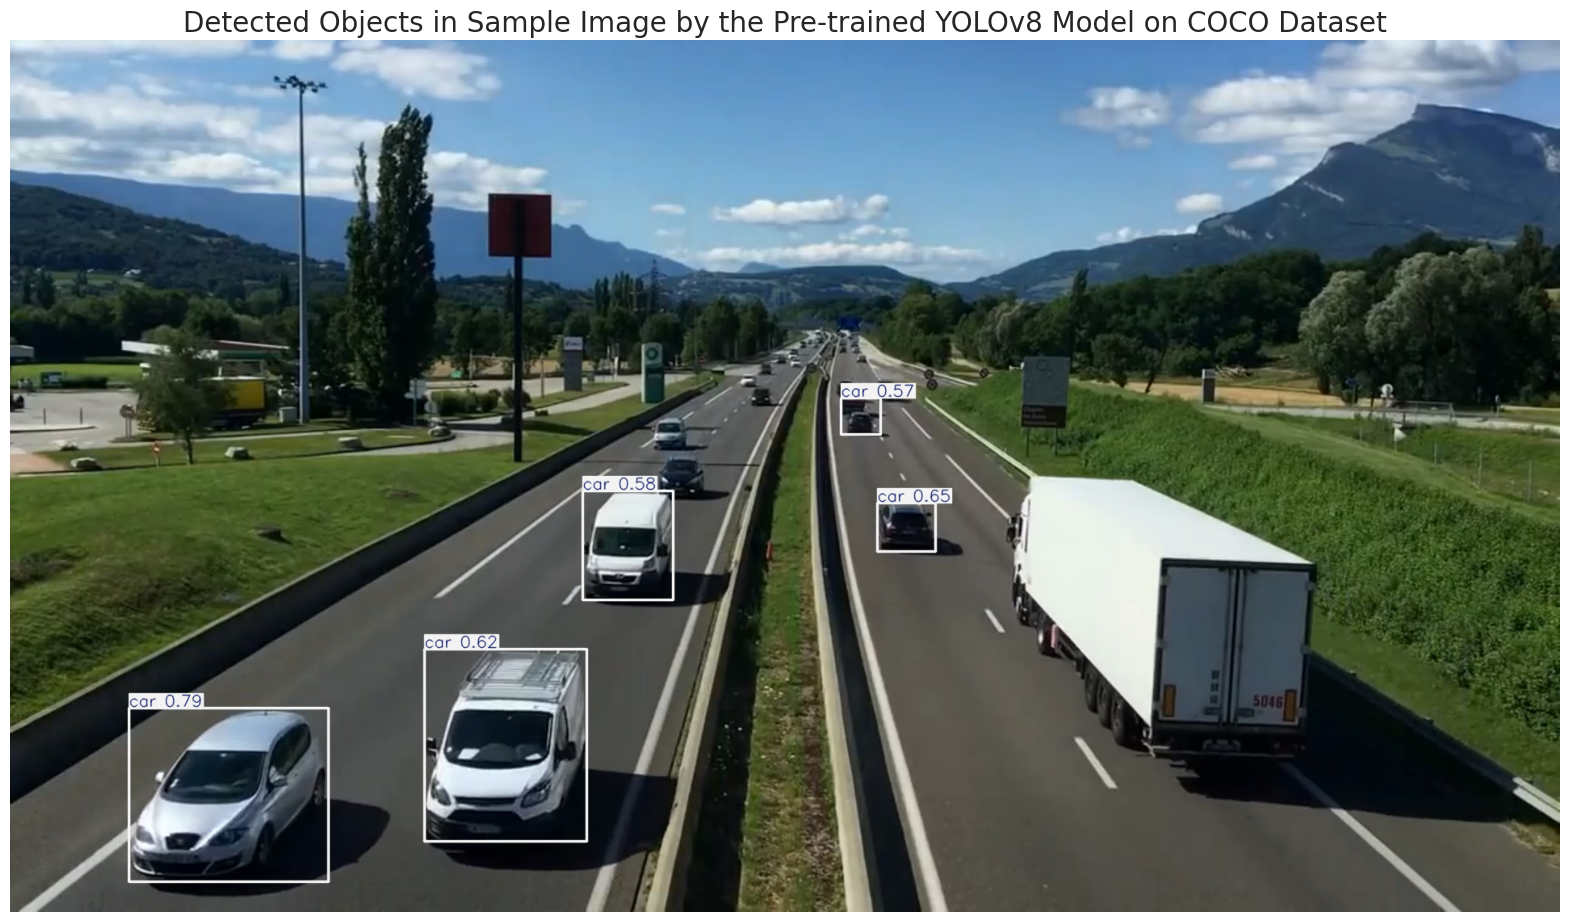

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np
import requests
from io import BytesIO
from PIL import Image

# Path to the image file
image_path = 'https://raw.githubusercontent.com/Sarthak-Kumar21/Traffic_object_detection/main/Vehicle_Detection_Image_Dataset/sample_image.jpg'

# Download the image from the URL
response = requests.get(image_path)
response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)
image = Image.open(BytesIO(response.content))

# Perform inference on the provided image(s)
# Pass the loaded image directly to the predict function
results = model.predict(source=image,
                        imgsz=640,  # Resize image to 640x640 (the size pf images the model was trained on)
                        conf=0.5)   # Confidence threshold: 50% (only detections above 50% confidence will be considered)

# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=2)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Pre-trained YOLOv8 Model on COCO Dataset', fontsize=20)
plt.axis('off')
plt.show()

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h2 style="font-size:22px; font-family:calibri; color:#141140;"><b>🔍 Pre-trained Model Detection Analysis</b></h2>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        In our sample image, the pre-trained model missed the detectable truck and car that were clearly visible. A model pre-trained on a dataset with a broad range of classes, like COCO's 80 different categories, may not perform as well on a specific subset of those categories due to the diversity of objects it has been trained to recognize. If we fine-tune this model on a specialized dataset that focuses solely on vehicles, it can learn to detect various types of vehicles more accurately. Fine-tuning on a vehicle-specific dataset allows the model to become more specialized, adjusting the weights to be more sensitive to features specific to vehicles. As a result, the model's mean Average Precision (mAP) for vehicle detection could improve because it's being optimized on a narrower, more relevant range of classes for our specific application. Fine-tuning also helps the model generalize better for vehicle detection tasks, potentially reducing false negatives (like missing a detectable truck) and improving overall detection performance.
    </p>
</div>


<a id="Dataset_Exploration"></a>
# <p style="background-color: #141140; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Exploration</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h2 style="font-size:22px; font-family:calibri; color:#141140;"><b>🚗 Dataset Preparation for Model Fine-tuning</b></h2>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        To fine-tune our pre-trained model on a specialized dataset that focuses solely on vehicles, so that it can learn to detect various types of vehicles more accurately, I have used a prepared dataset which is available at this link <a href="https://www.kaggle.com/datasets/farzadnekouei/top-view-vehicle-detection-image-dataset">Top-View Vehicle Detection Image Dataset for YOLOv8</a>. The dataset zeroes in on the 'Vehicle' class, covering a wide variety of vehicles such as cars, trucks, and buses. It is composed of 626 images sourced from top-view perspectives, <strong>annotated meticulously in the YOLOv8 format</strong> for effective vehicle detection.
    </p>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        The dataset undergoes a standardization process where each image is resized to a uniform resolution of <strong>640x640 pixels</strong>. To bolster the model's ability to generalize, augmentations were applied to the training data, which consists of 536 images. The validation set contains 90 images and remains unaugmented to preserve the integrity of performance evaluation.
    </p>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        This dataset, curated from <a href="https://www.pexels.com/search/videos/">Pexels</a>, captures the diversity of vehicles from an aerial view, making it ideal for highway monitoring tasks.
    </p>
</div>

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h2 style="font-size:22px; font-family:calibri; color:#141140;"><b>🗂️ YOLOv8 Dataset Format</b></h2>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        Our dataset, structured for YOLOv8 format, has been meticulously prepared on Roboflow. It encompasses all necessary components for an efficient object detection model training. Here’s a detailed breakdown:
    </p>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        <b>1️⃣ Train Directory:</b><br>
        The 'train' directory houses our training dataset. It includes 536 images within the 'images' subfolder and corresponding YOLOv8 format labels in the 'labels' subfolder.
    </p>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        <b>2️⃣ Validation Directory:</b><br>
        The 'valid' directory contains the validation dataset. This consists of 90 images in the 'images' subfolder and their respective YOLOv8 format labels in the 'labels' subfolder.
    </p>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        <b>3️⃣ data.yaml:</b><br>
        This file is the Ultralytics YOLO dataset configuration file. It specifies paths to the training and validation datasets, defines the number of classes (1), and the class name ('Vehicle'). This format is crucial for setting up and training the model accurately with our dataset.
    </p>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        <b>📝 Note about labels:</b><br>
        Labels in our dataset are formatted in YOLO style, where each image is associated with a *.txt file. These files describe the detected objects in a '<strong>class x_center y_center width height</strong>' format. Importantly, the box coordinates are normalized between 0 and 1. If an image has no detectable objects, it won’t have a corresponding *.txt file.
    </p>
</div>


<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Let's begin our exploration by examining the '<strong>data.yaml</strong>' file:</p>
</div>


In [ ]:
import os
import yaml
import requests

# Define the URL of the YAML file
dataset_path = 'https://raw.githubusercontent.com/Sarthak-Kumar21/Traffic_object_detection/main/Vehicle_Detection_Image_Dataset/data.yaml'

# Fetch the content of the YAML file from the URL
response = requests.get(dataset_path)
response.raise_for_status()  # Raise an exception for bad responses

# Load the YAML content from the response text
yaml_content = yaml.safe_load(response.text)

# Print the YAML content
print(yaml.dump(yaml_content, default_flow_style=False))

names:
- Vehicle
nc: 1
roboflow:
  license: CC BY 4.0
  project: vehicle_detection_yolov8
  url: https://universe.roboflow.com/farzad/vehicle_detection_yolov8/dataset/3
  version: 3
  workspace: farzad
train: https://github.com/Sarthak-Kumar21/Traffic_object_detection/raw/main/Vehicle_Detection_Image_Dataset/train/images
val: https://github.com/Sarthak-Kumar21/Traffic_object_detection/raw/main/Vehicle_Detection_Image_Dataset/valid/images



<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Now, let's continue our exploration by counting the images in both the training and validation sets and verifying their sizes:</p>
</div>

In [ ]:
import requests
from PIL import Image
import io

# GitHub repository details
repo_owner = "Sarthak-Kumar21"
repo_name = "Traffic_object_detection"
folder_path = "Vehicle_Detection_Image_Dataset/train/images"

# GitHub API URL to list the folder contents
api_url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/contents/{folder_path}"

# Fetch the list of files in the folder
response = requests.get(api_url)
response.raise_for_status()  # Ensure the request was successful
files = response.json()

# Initialize counters and sets for image sizes
num_train_images = 0
train_image_sizes = set()

# Download and check each .jpg image
for file in files:
    if file['name'].lower().endswith('.jpg'):
        num_train_images += 1
        image_url = file['download_url']
        image_response = requests.get(image_url)
        image_response.raise_for_status()
        with Image.open(io.BytesIO(image_response.content)) as img:
            train_image_sizes.add(img.size)

# Print the results
print(f"Number of images: {num_train_images}")
if len(train_image_sizes) == 1:
    print(f"All images have the same size: {train_image_sizes.pop()}")
else:
    print("Images have varying sizes.")


Number of images: 536
All images have the same size: (640, 640)


In [ ]:
# GitHub repository details
repo_owner = "Sarthak-Kumar21"
repo_name = "Traffic_object_detection"
folder_path = "Vehicle_Detection_Image_Dataset/valid/images"

# GitHub API URL to list the folder contents
api_url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/contents/{folder_path}"

# Fetch the list of files in the folder
response = requests.get(api_url)
response.raise_for_status()  # Ensure the request was successful
files = response.json()

# Initialize counters and sets for image sizes
num_valid_images = 0
valid_image_sizes = set()

# Download and check each .jpg image
for file in files:
    if file['name'].lower().endswith('.jpg'):
        num_valid_images += 1
        image_url = file['download_url']
        image_response = requests.get(image_url)
        image_response.raise_for_status()
        with Image.open(io.BytesIO(image_response.content)) as img:
            valid_image_sizes.add(img.size)

# Print the results
print(f"Number of images: {num_valid_images}")
if len(valid_image_sizes) == 1:
    print(f"All images have the same size: {valid_image_sizes.pop()}")
else:
    print("Images have varying sizes.")


Number of images: 90
All images have the same size: (640, 640)


<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h2 style="font-size:22px; font-family:calibri; color:#141140;"><b>📊 Dataset Analysis Insights</b></h2>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        The dataset for our project consists of 536 training images and 90 validation images, all uniformly sized at 640x640 pixels. This size aligns with the benchmark standard for the YOLOv8 model, ensuring optimal accuracy and speed during model performance. The split ratio of approximately 85% for training and 15% for validation provides a substantial amount of data for model learning while retaining enough images for effective model validation.
    </p>
</div>

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Let's take a look at a few images from the training dataset to get a sense of what the data looks like:</p>
</div>

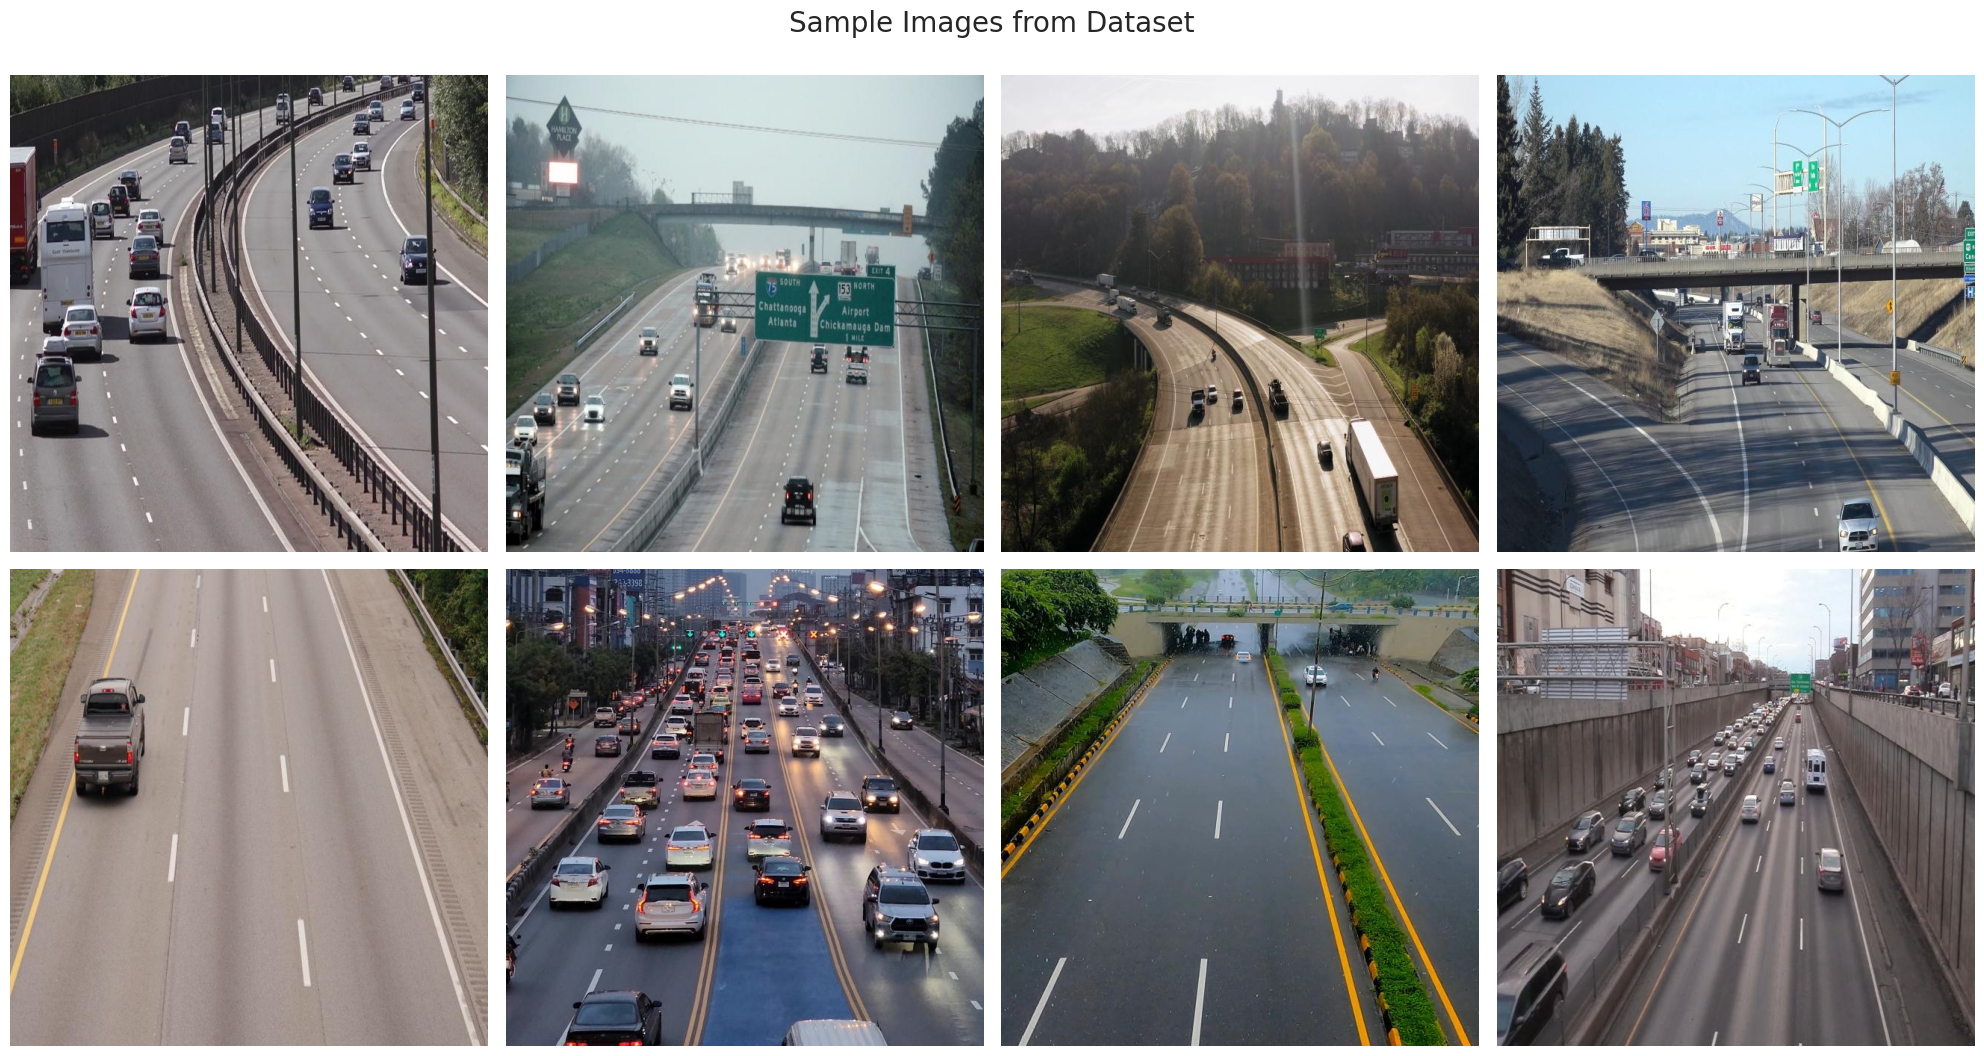

In [ ]:
# Function to fetch image from URL
def fetch_image(url):
    response = requests.get(url)
    response.raise_for_status()
    return Image.open(io.BytesIO(response.content))

# Select 8 images from the list of file URLs at equal intervals
def select_images(image_urls, num=8):
    total_images = len(image_urls)
    return [image_urls[i] for i in range(0, total_images, max(total_images // num, 1))][:num]

# URLs of images to be displayed
selected_image_urls = select_images([file['download_url'] for file in files if file['name'].endswith('.jpg')])

# Display the images in a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(20, 11))

for ax, img_url in zip(axes.ravel(), selected_image_urls):
    image = fetch_image(img_url)
    ax.imshow(image)
    ax.axis('off')

plt.suptitle('Sample Images from Dataset', fontsize=20)
plt.tight_layout()
plt.show()

Create a repository folder in google collab from github to access data files.

In [ ]:
!git clone https://github.com/Sarthak-Kumar21/Traffic_object_detection.git

Cloning into 'Traffic_object_detection'...
remote: Enumerating objects: 1274, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1274 (delta 1), reused 5 (delta 0), pack-reused 1266 (from 1)
Receiving objects: 100% (1274/1274), 45.30 MiB | 15.48 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
# Path to your dataset.yaml file
yaml_file = '/content/data.yaml'

# Updated configuration with local paths
updated_content = """train: /content/Traffic_object_detection/Vehicle_Detection_Image_Dataset/train/images
val: /content/Traffic_object_detection/Vehicle_Detection_Image_Dataset/valid/images

nc: 1
names: ['Vehicle']
"""

# Write the updated content to the .yaml file
with open(yaml_file, 'w') as file:
    file.write(updated_content)

print("Updated .yaml file with local paths.")


Updated .yaml file with local paths.


In [ ]:
import yaml

# Load and print the entire YAML file
with open('data.yaml', 'r') as file:
    try:
        data = yaml.safe_load(file)
        print(yaml.dump(data, default_flow_style=False))  # Print the entire content in a readable format
    except yaml.YAMLError as e:
        print("Error in YAML file:", e)


names:
- Vehicle
nc: 1
train: /content/Traffic_object_detection/Vehicle_Detection_Image_Dataset/train/images
val: /content/Traffic_object_detection/Vehicle_Detection_Image_Dataset/valid/images



<a id="Fine_Tuning_YOLOv8"></a>
# <p style="background-color: #141140; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 4 | Fine-Tuning YOLOv8 </p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px;

1.   List item

1.   List item
2.   List item


2.   List item

box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">In this step, we're going to fine-tune our YOLOv8 pre-trained object detection model using transfer learning, specifically tailoring it to our 'Top-View Vehicle Detection Image Dataset'. By leveraging the YOLOv8 model's existing weights from its training on the comprehensive COCO dataset, we start from a robust foundation rather than from scratch. This approach saves significant time and resources and also capitalizes on our focused dataset to enhance the model's ability to accurately recognize and detect vehicles in top-view images. This method of training enables efficient and effective model adaptation, ensuring it's finely attuned to the specificities of vehicle detection from aerial perspectives:</p>
</div>

In [ ]:
# Train the model on our custom dataset
results = model.train(
    data='data.yaml',     # Path to the dataset configuration file
    epochs=5,              # Number of epochs to train for
    imgsz=640,               # Size of input images as integer
    device='cpu',                # Device to run on, here cpu.
    patience=50,             # Epochs to wait for no observable improvement for early stopping of training
    batch=32,                # Number of images per batch
    optimizer='auto',        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
    lr0=0.0001,              # Initial learning rate
    lrf=0.1,                 # Final learning rate (lr0 * lrf)
    dropout=0.1,             # Use dropout regularization
    seed=0                   # Random seed for reproducibility
)

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=5, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None,

100%|██████████| 755k/755k [00:00<00:00, 117MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Traffic_object_detection/Vehicle_Detection_Image_Dataset/train/labels... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:00<00:00, 1827.07it/s]


train: New cache created: /content/Traffic_object_detection/Vehicle_Detection_Image_Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Traffic_object_detection/Vehicle_Detection_Image_Dataset/valid/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 2027.09it/s]

val: New cache created: /content/Traffic_object_detection/Vehicle_Detection_Image_Dataset/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      2.312      2.799      1.782        362        640: 100%|██████████| 17/17 [07:40<00:00, 27.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.89s/it]

                   all         90        937    0.00411      0.118    0.00312    0.00108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.526      1.281        1.2        345        640: 100%|██████████| 17/17 [07:27<00:00, 26.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.50s/it]

                   all         90        937    0.00611      0.176    0.00579    0.00215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.305     0.9929      1.075        376        640: 100%|██████████| 17/17 [07:20<00:00, 25.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.73s/it]

                   all         90        937      0.936      0.263      0.422      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.202     0.8852       1.03        367        640: 100%|██████████| 17/17 [07:24<00:00, 26.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.98s/it]

                   all         90        937       0.83      0.796      0.873      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.182     0.8417      1.024        281        640: 100%|██████████| 17/17 [07:20<00:00, 25.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.24s/it]

                   all         90        937      0.844      0.859      0.916      0.624



5 epochs completed in 0.662 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.00s/it]


                   all         90        937      0.844      0.859      0.916      0.624
Speed: 5.7ms preprocess, 247.9ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/train


<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h2 style="font-size:22px; font-family:calibri; color:#141140;"><b>🌐 Integration of Weights & Biases (Wandb) with YOLOv8</b></h2>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        Weights & Biases, known as <strong>wandb.ai</strong>, is an MLOps tool that works seamlessly with Ultralytics, including the YOLOv8 model. When we train our YOLOv8 model, <strong>wandb.ai</strong> helps to manage our machine learning experiments by monitoring the training process, logging important metrics, and saving outputs. It's like a dashboard where we can see how our model is learning, with all the details and visualizations to help us understand the training progress and results.
    </p>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        <b>🔑 Providing the API Key</b><br>
        During the model training, an API key is required for Weights & Biases to track and store our model's data. We'll be prompted to sign up at <a href="https://wandb.ai/authorize">https://wandb.ai/authorize</a> to get this key. After signing up, we copy the API key provided and paste it back into our training setup. This key connects our training session to the Weights & Biases platform, allowing us to access all the great features for monitoring and evaluating our model.
    </p>
</div>


<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h2 style="font-size:22px; font-family:calibri; color:#141140;"><b>📈 Understanding Run Summary Metrics</b></h2>
    <ul style="font-size:18px; font-family:calibri; line-height: 1.5em;">
        <li><b>Learning Rate per Group (lr/pg0, lr/pg1, lr/pg2):</b> These values represent the learning rate for different groups of layers in the neural network. A lower learning rate means the model updates its weights more slowly during training. Consistent learning rates across groups indicate uniform adjustments during the learning process.</li>
        <li><b>Mean Average Precision at 50% IoU (metrics/mAP50(B)):</b> This metric measures the model's accuracy in detecting objects with at least 50% Intersection over Union (IoU) with ground truth. A score of 0.97 suggests the model is highly accurate at this IoU threshold.</li>
        <li><b>Mean Average Precision across IoU from 50% to 95% (metrics/mAP50-95(B)):</b> This is an average of mAP calculated at different IoU thresholds, from 50% to 95%. A score of 0.74 indicates good overall accuracy across these varying thresholds.</li>
        <li><b>Precision (metrics/precision(B)):</b> Precision measures the ratio of correctly predicted positive observations to the total predicted positives. A score of 0.92 means the model is highly precise in its predictions.</li>
        <li><b>Recall (metrics/recall(B)):</b> Recall calculates the ratio of correctly predicted positive observations to all observations in actual class. A recall of 0.94 shows the model is very good at finding all relevant cases within the dataset.</li>
        <li><b>Model Computational Complexity (model/GFLOPs):</b> Indicates the model's computational demands, with the GFLOPs value suggesting moderate complexity.</li>
        <li><b>Model Parameters:</b> This is the total number of trainable parameters in the model. Almost 3 million parameters indicate a model of moderate size and complexity.</li>
        <li><b>Inference Speed (model/speed_PyTorch(ms)):</b> The time taken for the model to make a single prediction (inference). 4.6 ms is quite fast, which is good for real-time applications.</li>
        <li><b>Training Losses (train/box_loss, train/cls_loss, train/dfl_loss):</b>These are different types of losses during training. 'box_loss' refers to the error in bounding box predictions, 'cls_loss' to classification error, and 'dfl_loss' to distribution focal loss. Lower values indicate better performance.</li>
        <li><b>Validation Losses (val/box_loss, val/cls_loss, val/dfl_loss):</b> Similar to training losses, these are losses calculated on the validation dataset. They give an idea of how well the model generalizes to new, unseen data. Almost similar loss values for both training and validation indicate that the model is not overfitting.</li>
    </ul>
</div>


<a id="Model_Performance_Evaluation"></a>
# <p style="background-color: #141140; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 5 | Model Performance Evaluation </p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#eae8fa; padding: 20px; border-radius:

1.   List item
2.   List item

10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Post-training, our model generates several files and folders that encapsulate various aspects of the training run. Let's see the list of generated files:</p>
</div>

In [ ]:
# Define the path to the directory
post_training_files_path = '/content/runs/detect/train'

# List the files in the directory
!ls {post_training_files_path}

args.yaml					   P_curve.png	     train_batch2.jpg
confusion_matrix_normalized.png			   PR_curve.png      val_batch0_labels.jpg
confusion_matrix.png				   R_curve.png	     val_batch0_pred.jpg
events.out.tfevents.1730032281.abdd5cf7c7ed.310.0  results.csv	     val_batch1_labels.jpg
F1_curve.png					   results.png	     val_batch1_pred.jpg
labels_correlogram.jpg				   train_batch0.jpg  weights
labels.jpg					   train_batch1.jpg


<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h2 style="font-size:22px; font-family:calibri; color:#141140;"><b>📁 Training Output Files Explained</b></h2>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        Here’s a rundown of each item:
    </p>
    <ul style="font-size:18px; font-family:calibri; line-height: 1.5em;">
        <li><b>Weights Folder:</b> Contains the 'best.pt' and 'last.pt' files, which are the best and most recent weights of our trained model respectively.</li>
        <li><b>Args:</b> A file that stores the arguments or parameters that were used during the training process.</li>
        <li><b>Confusion Matrix:</b> Visual representations of the model performance. One is normalized, which helps in understanding the true positive rate across classes.</li>
        <li><b>Events File:</b> Contains logs of events that occurred during training, useful for debugging and analysis.</li>
        <li><b>F1 Curve:</b> Illustrates the F1 score of the model over time, balancing precision and recall.</li>
        <li><b>Labels:</b> Shows the distribution of different classes within the dataset and their correlation.</li>
        <li><b>P Curve, PR Curve, R Curve:</b> These are Precision, Precision-Recall, and Recall curves, respectively, providing insights into the trade-offs between different metrics at various thresholds.</li>
        <li><b>results:</b> This csv file captures a comprehensive set of performance metrics recorded at each epoch during the model's training process.</li>
        <li><b>Train Batch Images:</b> Sample images from the training set with model predictions overlaid, useful for a quick visual check of model performance.</li>
        <li><b>Validation Batch Images:</b> Similar to train batch images, these are from the validation set and include both labels and predictions, providing a glimpse into how well the model generalizes.</li>
    </ul>
</div>


<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        I will undertake a comprehensive evaluation and analysis of our model's performance, which involves:
    </p>
    <ul style="font-size:18px; font-family:calibri; line-height: 1.5em;">
        <li><b>Learning Curves Analysis</b></li>
        <li><b>Confusion Matrix Evaluation</b></li>
        <li><b>Performance Metrics Assessment</b></li>
    </ul>
</div>


<a id="Learning_Curves"></a>
# <b><span style='color:#b2addb'>Step 5.1 |</span><span style='color:#141140'> Learning Curves Analysis</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">In this step, let's review the training and validation loss trends over epochs to assess the learning stability and efficiency:</p>
</div>

In [ ]:
# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

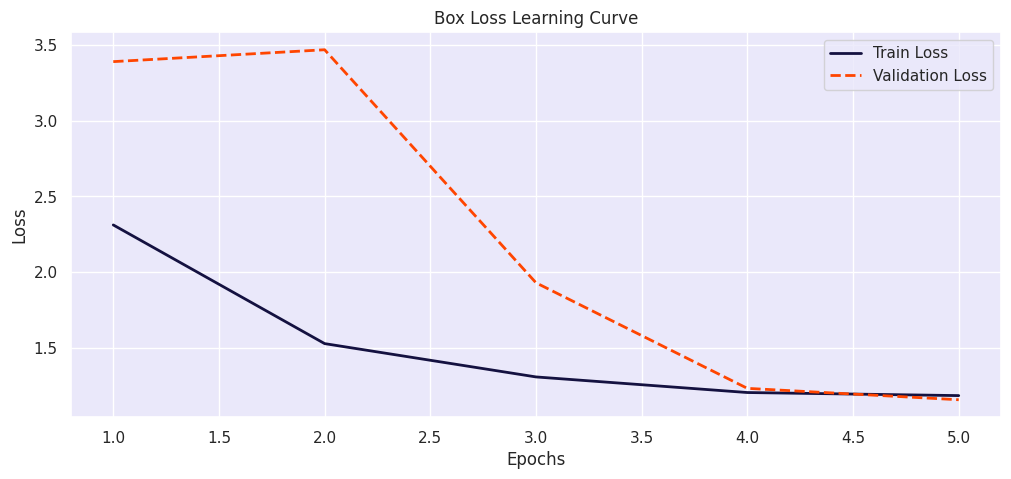

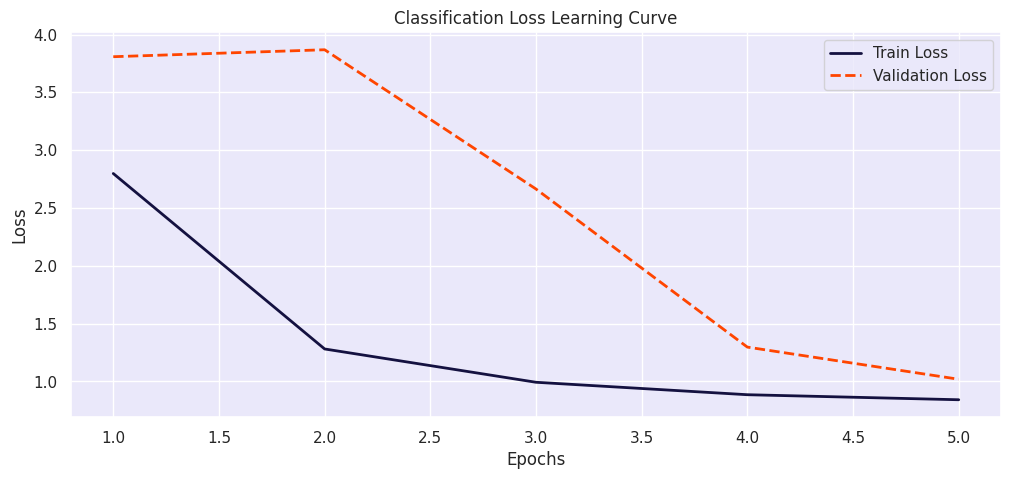

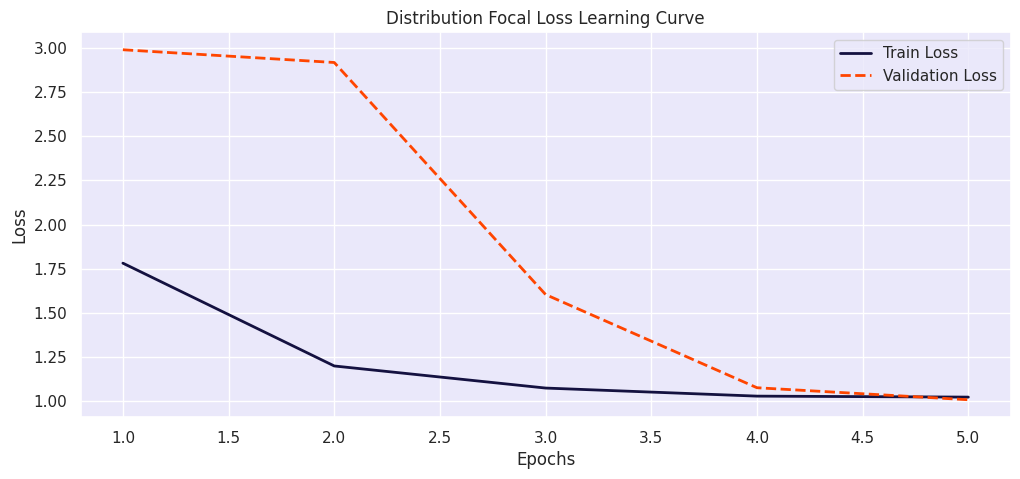

In [ ]:
# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h2 style="font-size:22px; font-family:calibri; color:#141140;"><b>📈 Model Learning Curve Analysis</b></h2>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        The learning curves for box loss, classification loss, and distribution focal loss indicate a rapid decrease in loss values during the initial epochs, leveling off as training progresses. This trend, along with the close alignment of training and validation loss lines, suggests that the model is learning effectively without overfitting, meaning it is well-tuned to the dataset without being biased or too variable.
    </p>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        The smoothness of the learning curves, especially evident in the latter epochs, implies that the model is reaching a state of equilibrium, where additional training does not significantly enhance performance. This observation suggests that 100 epochs are sufficient for training this model, as further training is unlikely to result in substantial gains.
</div>

<a id="Confusion_Matrix"></a>
# <b><span style='color:#b2addb'>Step 5.2 |</span><span style='color:#141140'> Confusion Matrix Evaluation</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        Next, I will focus on displaying and meticulously analyzing the confusion matrix derived from our model's performance on the validation dataset:
    </p>
</div>

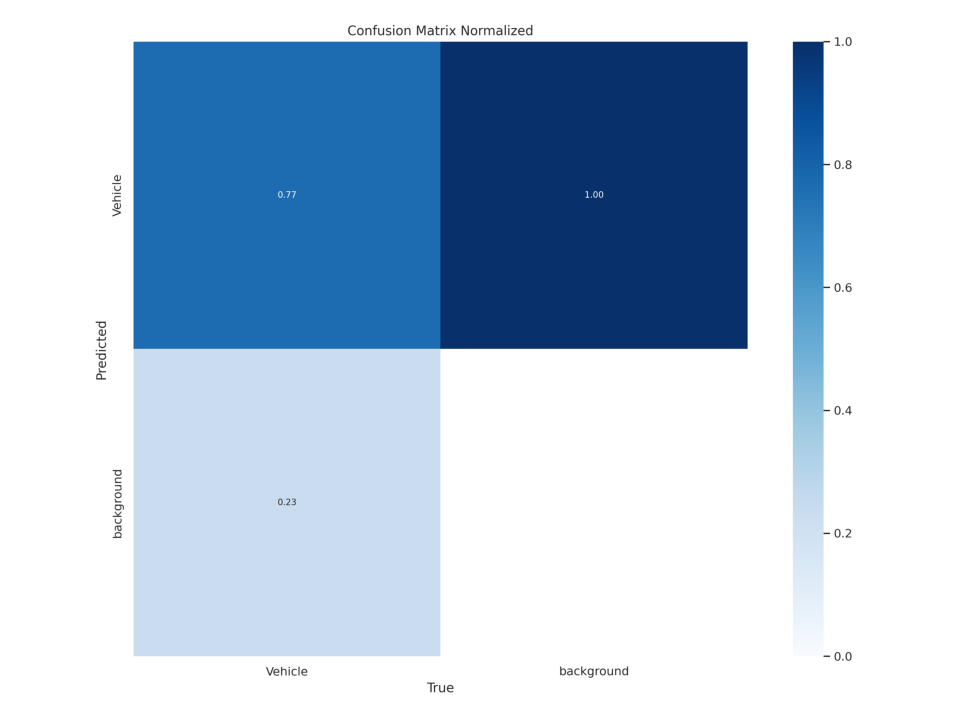

In [ ]:
# Construct the path to the normalized confusion matrix image
confusion_matrix_path = os.path.join(post_training_files_path, 'confusion_matrix_normalized.png')

# Read the image using cv2
cm_img = cv2.imread(confusion_matrix_path)

# Convert the image from BGR to RGB color space for accurate color representation with matplotlib
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off')
plt.show()

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h2 style="font-size:22px; font-family:calibri; color:#141140;"><b>🔍 Confusion Matrix Analysis</b></h2>
    <p style="font-size:18px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">
        The confusion matrix for our YOLOv8 vehicle detection model illustrates decent accuracy as mentioned earlier as well. In 77% of instances, the model successfully identifies the presence of a vehicle when there is one, indicating strong detection capability. Conversely, in 23% of cases, the model fails to detect a vehicle that is actually present, suggesting room for improvement in reducing false negatives.
    </p>
</div>


<a id="Performance_Metrics"></a>
# <b><span style='color:#b2addb'>Step 5.3 |</span><span style='color:#141140'> Performance Metrics Assessment</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;">Finally, I am delving into various metrics to understand the model's predictive accuracy and areas of potential improvement:</p>
</div>

In [ ]:
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Traffic_object_detection/Vehicle_Detection_Image_Dataset/valid/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]


                   all         90        937      0.844      0.859      0.916      0.624
Speed: 1.0ms preprocess, 8.8ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to runs/detect/val


as can be seen in the above verbose

In [ ]:
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
metrics_df.round(3)

Metric Value
metrics/precision(B)         0.844
metrics/recall(B)            0.859
metrics/mAP50(B)             0.916
metrics/mAP50-95(B)          0.624
fitness                      0.653

<div style="background-color:#eae8fa; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#141140;"><b>🔍 Model Evaluation Insights</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em;">
        The YOLOv8 model shows decent results on the validation set. With a precision of <b>84.4%</b>, it indicates that the majority of the predictions made by the model are correct. The recall score of <b>85.9%</b> demonstrates the model's ability to find most of the relevant cases in the dataset. The model's mean Average Precision (mAP) at 50% Intersection over Union (IoU) is <b>91.6%</b>, reflecting fair accuracy in detecting objects with a considerable overlap with the ground truth. When the IoU threshold range is expanded from 50% to 95%, the model displays a mAP of <b>62.4%</b>. Finally, the fitness score of <b>65.3%</b> indicates a okayish balance between precision, recall, and the IoU of the predictions. Given limited computation and training for only 5 epochs, these results are impressive. However future improvements are currently ongoing.
    </p>
</div>
